### Corona Virus Data Analyst 16th April 2020

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

Resources : WHO

This data analysis is focused on data wrangling, data cleaning and data visulization of Corona Virus on 8th March 2020.

The dataset is derived from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE. 

Here is the link consisting of all datased regarding Coronavirus

https://github.com/CSSEGISandData/COVID-19

1 - Determine which libraries is used for dataset

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import csv
import requests
# import the library
import folium
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from PIL import Image
from io import StringIO
%matplotlib inline

2 - Load data from csv file defined in the link repository

In [2]:
country_flags_dataset = "files/country_flags.csv"
country_flags_df = pd.read_csv(country_flags_dataset, error_bad_lines=False ,sep = ';', encoding = "ISO-8859-1")

In [3]:
corona_csv_file = "04-15-2020.csv"    
url_daily = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'     
corona_data_df = pd.read_csv(url_daily + corona_csv_file, error_bad_lines=False,encoding = "utf-8")

3 - Show columns of the dataframe

In [4]:
corona_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
FIPS              2750 non-null float64
Admin2            2758 non-null object
Province_State    2846 non-null object
Country_Region    3027 non-null object
Last_Update       3027 non-null object
Lat               2968 non-null float64
Long_             2968 non-null float64
Confirmed         3027 non-null int64
Deaths            3027 non-null int64
Recovered         3027 non-null int64
Active            3027 non-null int64
Combined_Key      3027 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 283.9+ KB


4 - Remove 'Lat', 'Long','FIPS','Admin2' column of dataframes

In [5]:
corona_data_df.drop(['Lat', 'Long_','FIPS','Admin2'], axis=1, inplace=True)

5 - Get only time schedule in terms of Country/Region

In [6]:
corona_data_df = corona_data_df.groupby(['Country_Region']).sum().reset_index()
corona_data_df

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,784,25,43,716
1,Albania,494,25,251,218
2,Algeria,2160,336,708,1116
3,Andorra,673,33,169,471
4,Angola,19,2,5,12
5,Antigua and Barbuda,23,2,3,18
6,Argentina,2443,111,596,1736
7,Armenia,1111,17,297,797
8,Australia,6440,63,2186,4191
9,Austria,14336,393,8098,5845


6 - Add Country_Flag_URL column to corona_data_df

In [7]:
corona_data_df.insert(1,'Country_Flag_URL','')

7 - Insert Flag Url to each dataframe

In [8]:
countries_list = corona_data_df['Country_Region'].unique()

flags_unk_1 = []
for cnt in countries_list:
    flag = country_flags_df[country_flags_df['Country Name']==cnt]['Image URL']
    flag = list(flag)
    if flag:
        index = corona_data_df[corona_data_df['Country_Region']==cnt].index
        corona_data_df.at[index,'Country_Flag_URL']=flag[0]
    else:
        flags_unk_1.append(cnt)
        
corona_data_df.head()        

,Country_Region,Country_Flag_URL,Confirmed,Deaths,Recovered,Active
0,Afghanistan,https://www.countryflags.io/af/flat/64.png,784,25,43,716
1,Albania,https://www.countryflags.io/AL/flat/64.png,494,25,251,218
2,Algeria,https://www.countryflags.io/DZ/flat/64.png,2160,336,708,1116
3,Andorra,https://www.countryflags.io/ad/flat/64.png,673,33,169,471
4,Angola,https://www.countryflags.io/AO/flat/64.png,19,2,5,12


8 - Save the dataframe as csv file

In [9]:
corona_data_df.to_csv('files/corona_country_flag.csv', index=False)

9 - Get top 10 countries in terms of Confirmed, Recovered, Deaths, Active

In [10]:
corona_data_df = corona_data_df.rename(columns={"Country_Region": "country"})
df_confirmed = corona_data_df.sort_values('Confirmed', ascending= False).head(10)
df_recovered = corona_data_df.sort_values('Recovered', ascending= False).head(10)
df_deaths = corona_data_df.sort_values('Deaths', ascending= False).head(10)
df_active = corona_data_df.sort_values('Active', ascending= False).head(10)

10 - Write funtion to show country flag

In [11]:
def get_flag(name):
    r = requests.get(name,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    country_pic = plt.imread(r.raw)
    return country_pic

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)


11 - Draw figures about total confirmed, death and recovered for each country

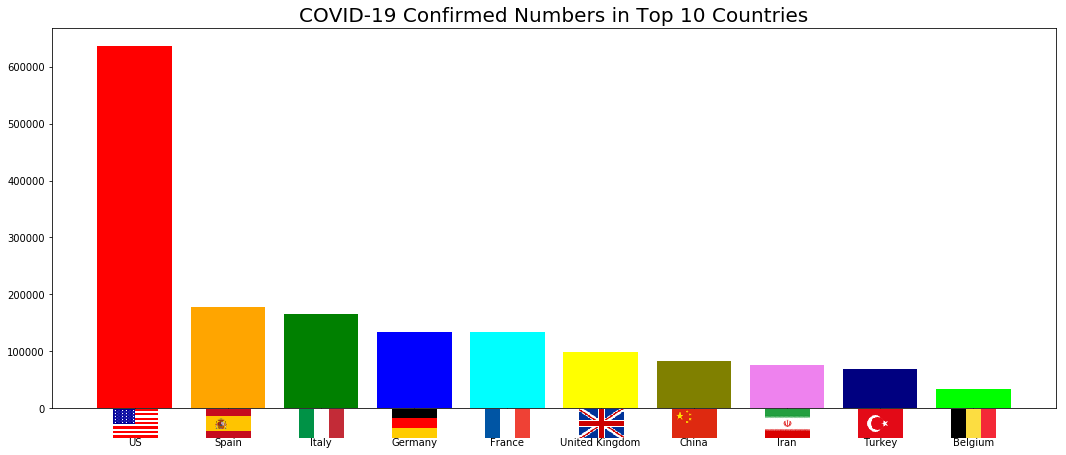

In [12]:
plt.figure(figsize=(18,7))
countries = np.asarray(df_confirmed["Country_Flag_URL"])    

# fig, ax = plt.subplots()
color = ['red', 'orange', 
         'green', 'blue', 
         'cyan', 'yellow',
         'olive','violet',
         'navy','lime'
        ]

plt.bar(range(len(countries)), df_confirmed["Confirmed"], color= color )
plt.gca().set_xticks(range(len(countries)))
plt.gca().set_xticklabels(df_confirmed["country"])
plt.gca().set_title('COVID-19 Confirmed Numbers in Top 10 Countries' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=26)
for i, c in enumerate(countries):
    offset_image(i, c, plt.gca())

plt.savefig('images/image1.png')
plt.show();

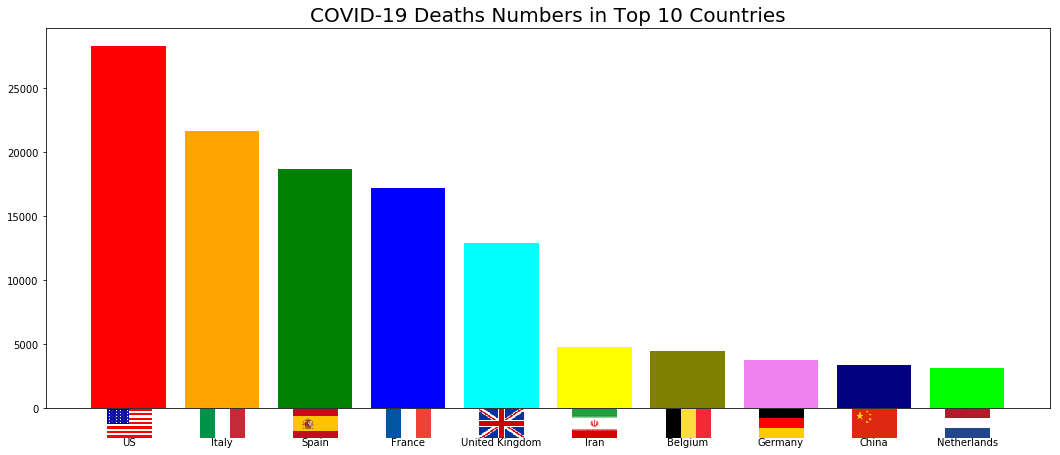

In [13]:
plt.figure(figsize=(18,7))
countries = np.asarray(df_deaths["Country_Flag_URL"])    

# fig, ax = plt.subplots()
color = ['red', 'orange', 
         'green', 'blue', 
         'cyan', 'yellow',
         'olive','violet',
         'navy','lime'
        ]

plt.bar(range(len(countries)), df_deaths["Deaths"], color= color )
plt.gca().set_xticks(range(len(countries)))
plt.gca().set_xticklabels(df_deaths["country"])
plt.gca().set_title('COVID-19 Deaths Numbers in Top 10 Countries' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=26)
for i, c in enumerate(countries):
    offset_image(i, c, plt.gca())

plt.savefig('images/image2.png')
plt.show();

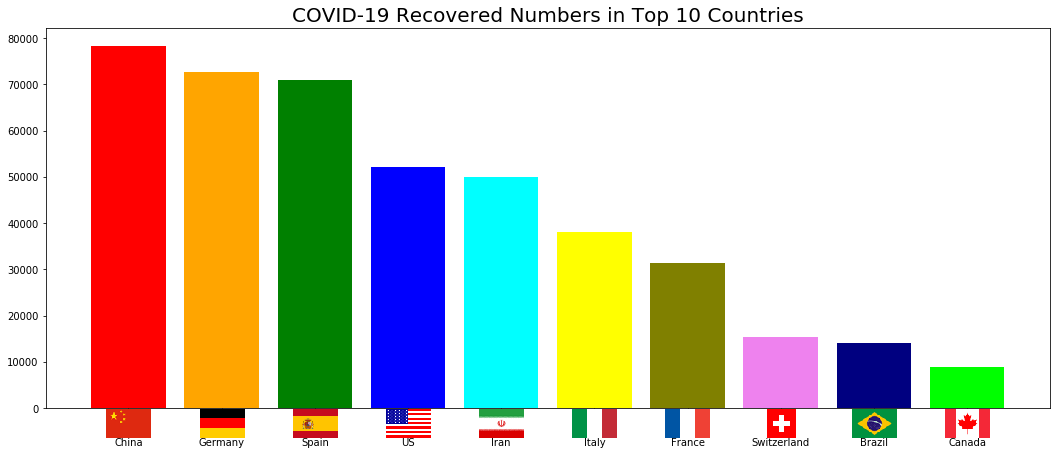

In [14]:
plt.figure(figsize=(18,7))
countries = np.asarray(df_recovered["Country_Flag_URL"])    

# fig, ax = plt.subplots()
color = ['red', 'orange', 
         'green', 'blue', 
         'cyan', 'yellow',
         'olive','violet',
         'navy','lime'
        ]

plt.bar(range(len(countries)), df_recovered["Recovered"], color= color )
plt.gca().set_xticks(range(len(countries)))
plt.gca().set_xticklabels(df_recovered["country"])
plt.gca().set_title('COVID-19 Recovered Numbers in Top 10 Countries' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=26)
for i, c in enumerate(countries):
    offset_image(i, c, plt.gca())

plt.savefig('images/image3.png')
plt.show();

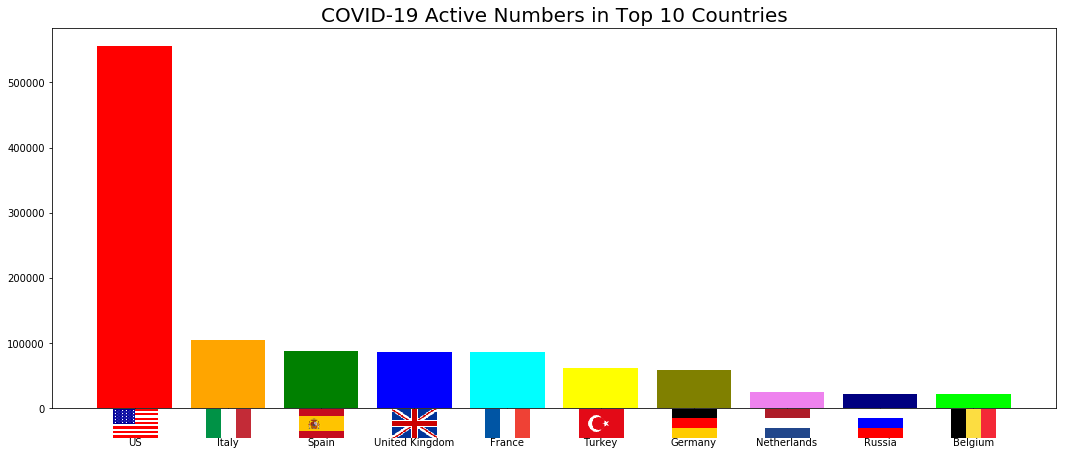

In [15]:
plt.figure(figsize=(18,7))
countries = np.asarray(df_active["Country_Flag_URL"])    

# fig, ax = plt.subplots()
color = ['red', 'orange', 
         'green', 'blue', 
         'cyan', 'yellow',
         'olive','violet',
         'navy','lime'
        ]

plt.bar(range(len(countries)), df_active["Active"], color= color )
plt.gca().set_xticks(range(len(countries)))
plt.gca().set_xticklabels(df_active["country"])
plt.gca().set_title('COVID-19 Active Numbers in Top 10 Countries' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=26)
for i, c in enumerate(countries):
    offset_image(i, c, plt.gca())

plt.savefig('images/image4.png')
plt.show();